In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import train_test_split

<strong>
    In this section we import dataset from sklearn. <br>
    This dataset normalized with Standard Deviation Scaler before.
</strong>

In [65]:
def input_dataset():
    dataset= datasets.load_diabetes() # Dataset normalized with Standard Deviation Scaler
    features= dataset['feature_names']
    final_dataset= pd.DataFrame(dataset['data'], columns=[features])
    final_dataset= final_dataset.assign(target= dataset['target'])
    return final_dataset

In [66]:
final_dataset= input_dataset()

In [67]:
final_dataset.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


<strong>
    In this section we split dataset to X_train and X_test
</strong>

In [68]:
X_train, X_test, y_train, y_test= train_test_split(final_dataset[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
                                                   ,final_dataset[['target']], test_size= 0.3)

<strong>
    in this implementation i used following Cost Function <br>
    </strong>
<h3>
    <p style="color:red">
        h(<font face="Symbol">q</font>)= 0.5 * &sum;<sub>i=1</sub><sup>m</sup>(h<sub><font face="Symbol">q</font></sub>             (x<sup>i</sup>) - y<sup>i</sup>)<sup>2</sup>
    </p>
</h3>
<br>
Where 'm' is number of records and h<sub><font face="Symbol">q</font></sub>(X) is :<br>
<h3>
    <p style="color:red">
        h<sub><font face="Symbol">q</font></sub>(X)= <font face="Symbol">q</font><sub>0</sub>X<sub>0</sub> + <font                 face="Symbol">q</font><sub>1</sub>X<sub>1</sub> + ... + <font face="Symbol">q</font><sub>n</sub>X<sub>n</sub>
    </p>
</h3>
<br>
'n' is number of features and values of  X<sub>0</sub> is vector of 1s

In [69]:
def cost_function(X_train, y_train, theta):
    h_x= np.dot(X_train, theta)
    error= h_x - y_train
    cost= (0.5 * y_train.size) * np.dot(error.T, error)
    return cost, error, h_x

<strong>
    Now we implement Gradient Descent with following formula:<br>
</strong>
<h3>
    <p style="color:red">
        <font face="Symbol">q</font><sub>j</sub>= <font face="Symbol">q</font><sub>j</sub> - (<sup>1</sup>&frasl;<sub>m</sub> . <font face="Symbol">a</font>)<font face="Symbol">&#229;</font><sub>i=1</sub><sup>m</sup> (h<sub><font         face="Symbol">q</font></sub>(X<sup>i</sup>) - y<sup>i</sup>).X<sup>i</sup>
    </p>
</h3>
<strong>
that number of  j is number of features + 1
    </strong>

In [70]:
def fit(X_train, y_train, learning_rate= .001, max_iter= 5000):
    X_train.insert(loc= 0, column='theta0',value= 1)
    num_of_features= len(X_train.columns)
    m= y_train.size
    theta= np.random.rand(num_of_features, 1)
    theta_values= []
    cost_values= []
    h_x_values= []
    try:
        for i in range(max_iter):
            cost, error, h_x= cost_function(X_train, y_train, theta)
            h_x_values.append(h_x)
            cost_values.append(cost)
            theta= theta - (learning_rate * (1/m) * np.dot(X_train.T, error))
            theta_values.append(theta)
    except:
        print("Please check your input. may be you don't add X_train or y_train correct!!")
        
    return cost_values, theta_values, h_x_values

In [71]:
cost_values, theta_values, h_x_values= fit(X_train, y_train)

In [56]:
d= np.array(cost_values)
cost= d.ravel()

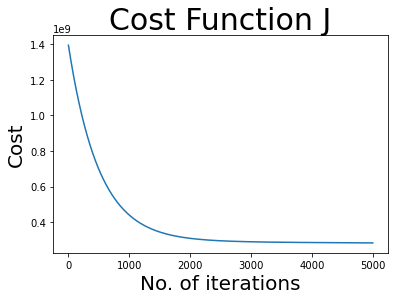

In [57]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost)
plt.show()

In [61]:
def predict(X_test):
    X_test.insert(loc= 0, column= 'Theta0',value= 1)
    theta= theta_values[-1]
    pred= np.dot(X_test, theta)
    return pred

In [62]:
prediction= predict(X_test)
prediction= prediction.ravel()

In [63]:
np.round(prediction)

array([152., 153., 152., 153., 151., 153., 153., 151., 151., 150., 152.,
       149., 151., 154., 153., 149., 149., 150., 152., 150., 152., 149.,
       149., 152., 150., 150., 148., 152., 152., 153., 150., 150., 151.,
       153., 152., 147., 150., 150., 154., 152., 152., 150., 149., 149.,
       151., 150., 153., 150., 148., 152., 153., 155., 155., 150., 152.,
       153., 153., 150., 153., 150., 152., 147., 149., 151., 154., 155.,
       152., 149., 150., 151., 152., 154., 153., 150., 152., 151., 150.,
       152., 149., 150., 150., 150., 149., 149., 152., 150., 150., 148.,
       153., 148., 151., 154., 147., 155., 153., 151., 156., 148., 152.,
       152., 148., 154., 147., 152., 154., 149., 151., 148., 149., 153.,
       151., 152., 151., 149., 149., 148., 152., 150., 150., 156., 153.,
       152., 153., 150., 152., 151., 148., 148., 152., 150., 152., 155.,
       147.])

In [64]:
y_test.values.ravel()

array([ 63., 195., 144., 246., 141., 164., 137.,  52., 252., 199., 206.,
        81., 134., 180., 171., 104., 190.,  59., 202.,  90., 196., 178.,
        69., 109.,  66.,  88.,  72.,  91., 200., 190., 121.,  53.,  51.,
       272.,  90.,  85.,  72., 155., 249., 198., 166., 102., 185.,  92.,
       242.,  86., 144., 102.,  59., 174., 232., 264., 248., 214., 265.,
       196., 279.,  53., 217., 172., 230.,  55., 179., 102., 275., 341.,
       126., 168., 160., 293., 128., 215., 296., 200.,  91., 177.,  67.,
        99., 128., 127., 183.,  47.,  68., 104., 202.,  25.,  88.,  78.,
       268.,  77., 185., 308.,  48., 252., 220., 104., 310.,  83., 245.,
       219.,  77., 152., 152., 150., 163.,  48.,  95., 116.,  72., 236.,
       200., 288.,  58., 113.,  40.,  65., 124.,  95., 151., 243., 168.,
       220.,  81., 103., 151., 124., 150.,  87., 262., 182., 116., 233.,
        60.])